In [1]:
import tensorflow as tf


In [2]:
def modelo_mlp (input_dim):
    model = models.Sequential([
        
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model
     

In [3]:
import pandas as pd
import numpy as np

# DATOS PRUEBA  
datos_prueba = {
    'src_port': np.random.randint(1024, 65535, 100),
    'dst_port': [80]*100,
    'proto': [6]*100,
    'packets': np.random.randint(1, 1000, 100),
    'bytes': np.random.randint(64, 100000, 100),
    'first_seen_sec': [1700000000]*100,
    'last_seen_sec': [1700000005]*100,
    'first_seen_usec': [0]*100,
    'last_seen_usec': [0]*100
}

\
pd.DataFrame(datos_prueba).to_csv('datos_entrada.csv', index=False)
print("Archivo 'datos_entrada.csv' generado para pruebas.")

Archivo 'datos_entrada.csv' generado para pruebas.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Orden: src_ip, dst_ip, proto, duration, packets, bytes, pps, bps, bpp
columnas = ['src_ip', 'dst_ip', 'proto', 'duration', 'packets', 'bytes', 'pps', 'bps', 'bpp']

# 2. Cargamos el archivo 
df = pd.read_csv('flows.csv', header=None, names=columnas)

# 3. Seleccionamos las características (features)

features = ['proto', 'duration', 'packets', 'bytes', 'pps', 'bps', 'bpp']
X = df[features]

# 4. Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Creamos los sets de entrenamiento y prueba
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print("¡Listo! Datos cargados, normalizados y divididos correctamente.")


¡Listo! Datos cargados, normalizados y divididos correctamente.


In [6]:
from sklearn.ensemble import IsolationForest


iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Entrenar 
iso_forest.fit(X_train)

#  -1 es anomalía  1 es normal
y_pred = iso_forest.predict(X_test)

In [7]:
# cuántos normales (1) y cuántas anomalías (-1) detecta
resultados = pd.Series(y_pred).value_counts()
print("Detecciones del modelo:")
print(resultados)

# ver porcentaje 
anomalias_porcentaje = (resultados.get(-1, 0) / len(y_pred)) * 100
print(f"\nPorcentaje de anomalías detectadas: {anomalias_porcentaje:.2f}%")

Detecciones del modelo:
 1    27
-1     4
Name: count, dtype: int64

Porcentaje de anomalías detectadas: 12.90%


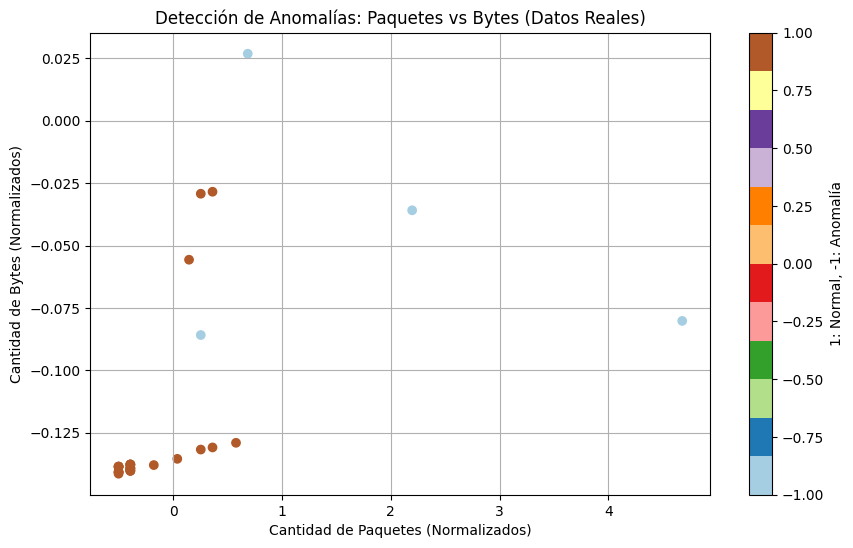

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# [:, 2] para todos los elementos de la columna 'packets' 
# [:, 3] para todos los elementos de la columna 'bytes'
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_pred, cmap='Paired', label='Tráfico')

plt.title('Detección de Anomalías: Paquetes vs Bytes (Datos Reales)')
plt.xlabel('Cantidad de Paquetes (Normalizados)')
plt.ylabel('Cantidad de Bytes (Normalizados)')
plt.colorbar(label='1: Normal, -1: Anomalía')
plt.grid(True)
plt.show()